## CMSC 25025
## CNN for Cifar Dataset

In [14]:
import tensorflow as tf, time, matplotlib.pyplot as plt, numpy as np, random
from tensorflow import keras
from skimage import color

In [2]:
def one_hot(values,n_values=10):
    n_v= np.maximum(n_values,np.max(values) + 1)
    oh = np.eye(n_v)[values]
    return oh

X = np.load('/project2/cmsc25025/mnist/CIFAR_10.npy').astype(np.float64) / 255
Y = one_hot(np.load('/project2/cmsc25025/mnist/CIFAR_labels.npy'))
L = 50000
train_set = (X[:int(4/5*L)], Y[:int(4/5*L)])
val_set = (X[int(4/5*L):int(L)], Y[int(4/5*L):int(L)])

test_set = (np.load('/project2/cmsc25025/mnist/CIFAR_10_test.npy').astype(np.float64) / 255,
            one_hot(np.load('/project2/cmsc25025/mnist/CIFAR_labels_test.npy')))


## (a)

In [25]:
def plot_images(layer, nrows, ncols):
    plt.figure(figsize=(ncols, nrows))
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(layer[i])
        plt.axis('off')
    plt.axis('off')
    plt.show()

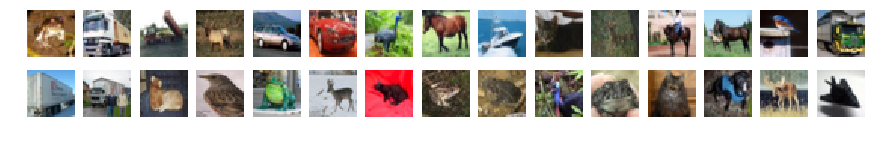

In [75]:
plot_images(X[:30], 2, 15)

## (b)

In [45]:
def fit_model(f, step):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer((32, 32, 3)))
    for i in range(len(f)): # add layers
        model.add(keras.layers.Conv2D(filters=f[i], kernel_size=(5,5),
                                      padding='same', activation='relu'))
        model.add(keras.layers.MaxPool2D())
        model.add(keras.layers.Dropout(rate=0.4))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=1024, activation='relu'))
    model.add(keras.layers.Dense(units=10, activation='softmax'))
    model.compile(optimizer=tf.train.AdadeltaOptimizer(step),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

In [78]:
ep = 20
model = fit_model([32, 64], .1)
fit = model.fit(x=train_set[0], y=train_set[1],
                 epochs=ep, batch_size=500, shuffle=True,
                 validation_data=val_set)
train_errors = 1-np.array(fit.history.get('acc'))
val_errors = 1-np.array(fit.history.get('val_acc'))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 7s 167us/step - loss: 2.2405 - acc: 0.1673 - val_loss: 2.1355 - val_acc: 0.2143
Epoch 2/20
40000/40000 [==============================] - 5s 125us/step - loss: 2.0397 - acc: 0.2600 - val_loss: 1.9502 - val_acc: 0.3192
Epoch 3/20
40000/40000 [==============================] - 5s 133us/step - loss: 1.9089 - acc: 0.3163 - val_loss: 1.8386 - val_acc: 0.3528
Epoch 4/20
40000/40000 [==============================] - 5s 124us/step - loss: 1.8284 - acc: 0.3505 - val_loss: 1.8183 - val_acc: 0.3512
Epoch 5/20
40000/40000 [==============================] - 5s 132us/step - loss: 1.7546 - acc: 0.3753 - val_loss: 1.7531 - val_acc: 0.3784
Epoch 6/20
40000/40000 [==============================] - 5s 127us/step - loss: 1.7052 - acc: 0.3929 - val_loss: 1.6748 - val_acc: 0.4097
Epoch 7/20
40000/40000 [==============================] - 5s 125us/step - loss: 1.6709 - acc: 0.4075 - val_loss: 1.6314 - 

In [79]:
test_error = 1-model.evaluate(test_set[0], test_set[1])[1]
print("Error running original architecture: %.3f%%" % (test_error*100))

10000/10000 [==============================] - 1s 98us/step
Error running original architecture: 49.200%


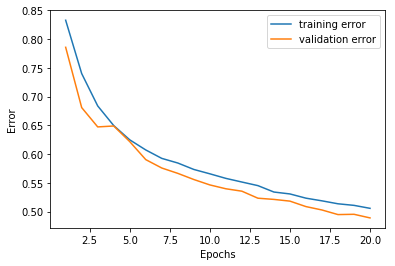

In [80]:
plt.plot(range(1,ep+1), train_errors, label = 'training error')
plt.plot(range(1,ep+1), val_errors, label = 'validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [81]:
def plot_images(layer, nrows, ncols):
    plt.figure(figsize=(ncols, nrows))
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(layer[i][0], cmap='brg')
        plt.axis('off')
    plt.axis('off')
    plt.show()

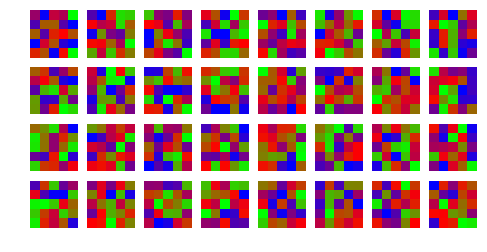

In [82]:
plot_images(model.layers[0].get_weights()[0].T, 4, 8)

## (c)

In [50]:
ep = 30
model = fit_model([32, 64, 32, 64], .7)
fit = model.fit(x=train_set[0], y=train_set[1],
                 epochs=ep, batch_size=250, shuffle=True,
                 validation_data=val_set)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 7s 177us/step - loss: 2.2025 - acc: 0.1663 - val_loss: 2.0826 - val_acc: 0.2423
Epoch 2/30
40000/40000 [==============================] - 6s 153us/step - loss: 1.9811 - acc: 0.2685 - val_loss: 1.8755 - val_acc: 0.3416
Epoch 3/30
40000/40000 [==============================] - 6s 155us/step - loss: 1.8246 - acc: 0.3281 - val_loss: 1.7757 - val_acc: 0.3676
Epoch 4/30
40000/40000 [==============================] - 6s 153us/step - loss: 1.7292 - acc: 0.3609 - val_loss: 1.6588 - val_acc: 0.4157
Epoch 5/30
40000/40000 [==============================] - 6s 152us/step - loss: 1.6440 - acc: 0.3911 - val_loss: 1.5881 - val_acc: 0.4339
Epoch 6/30
40000/40000 [==============================] - 6s 153us/step - loss: 1.5828 - acc: 0.4177 - val_loss: 1.5294 - val_acc: 0.4585
Epoch 7/30
40000/40000 [==============================] - 6s 154us/step - loss: 1.5288 - acc: 0.4389 - val_loss: 1.4536 - 

In [51]:
test_error = 1-model.evaluate(test_set[0], test_set[1])[1]
print("Error running 4 layers: %.3f%%" % (test_error*100))

10000/10000 [==============================] - 1s 97us/step
Error running 4 layers: 34.700%


## (d)

In [41]:
X_hsv = np.array([color.rgb2hsv(x) for x in X])
X_new = []
for i in range(len(X_hsv)):
    x_new = []
    for xi in X_hsv[i]:
        xi_new = []
        for xj in xi:
            new = xj[1] * random.uniform(.75, 1.25)
            if new > 1:
                new = 1
            xi_new.append([xj[0], new, xj[2]])
        x_new.append(xi_new)
    X_new.append(x_new)
X_trans = np.array([color.hsv2rgb(x) for x in X_new])

In [44]:
test_hsv = np.array([color.rgb2hsv(x) for x in test_set[0]])
test = []
for i in range(len(test_hsv)):
    x_new = []
    for xi in test_hsv[i]:
        xi_new = []
        for xj in xi:
            new = xj[1] * random.uniform(.75, 1.25)
            if new > 1:
                new = 1
            xi_new.append([xj[0], new, xj[2]])
        x_new.append(xi_new)
    test.append(x_new)
test_trans = np.array([color.hsv2rgb(x) for x in test])

In [46]:
L = 50000
train_set_trans = (X_trans[:int(4/5*L)]/255, X_trans[:int(4/5*L)])
val_set_trans = (X_trans[int(4/5*L):int(L)]/255, X_trans[int(4/5*L):int(L)])
test_set_trans = (test_trans, test_set[1])

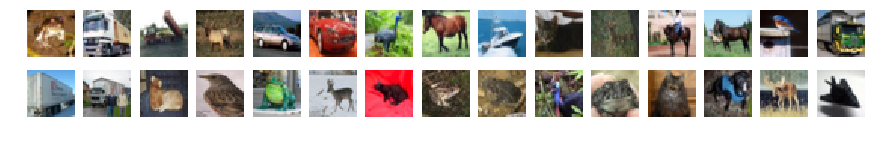

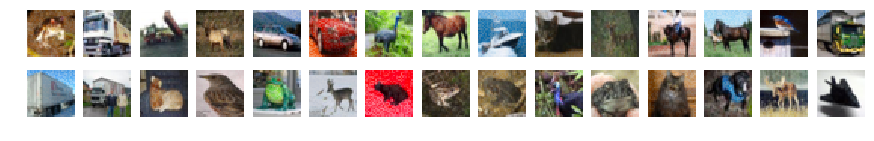

In [47]:
plot_images(X[:30], 2, 15)
plot_images(X_trans[:30], 2, 15)

The changes are not very important but still noticeable.

In [48]:
model = fit_model([32, 64, 32, 64], .7)
fit = model.fit(x=train_set[0], y=train_set[1],
                 epochs=ep, batch_size=250, shuffle=True,
                 validation_data=val_set)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 7s 164us/step - loss: 2.2180 - acc: 0.1645 - val_loss: 2.0883 - val_acc: 0.2401
Epoch 2/30
40000/40000 [==============================] - 6s 141us/step - loss: 2.0141 - acc: 0.2546 - val_loss: 1.8552 - val_acc: 0.3349
Epoch 3/30
40000/40000 [==============================] - 6s 141us/step - loss: 1.8315 - acc: 0.3248 - val_loss: 1.8346 - val_acc: 0.3340
Epoch 4/30
40000/40000 [==============================] - 6s 139us/step - loss: 1.7164 - acc: 0.3676 - val_loss: 1.6630 - val_acc: 0.4004
Epoch 5/30
40000/40000 [==============================] - 6s 140us/step - loss: 1.6306 - acc: 0.3982 - val_loss: 1.5538 - val_acc: 0.4402
Epoch 6/30
40000/40000 [==============================] - 6s 143us/step - loss: 1.5720 - acc: 0.4205 - val_loss: 1.5047 - val_acc: 0.4687
Epoch 7/30
40000/40000 [==============================] - 6s 139us/step - loss: 1.5293 - acc: 0.4383 - val_loss: 1.4807 - 

In [49]:
test_error = 1-model.evaluate(test_set[0], test_set[1])[1]
print("Error running on new transformed data: %.3f%%" % (test_error*100))

10000/10000 [==============================] - 1s 97us/step
Error running on new transformed data: 35.760%


We can see that changing the saturation did not hurt the model, while rotating images in the MNIST data had a very big impact on the error of the model.